In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	6
float64		column 2	6
float64		column 3	6
float64		column 4	9
float64		column 5	9
float64		column 6	3
float64		column 7	3
float64		column 8	6


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,762.000000,762.000000,762.000000,759.000000,759.000000,765.000000,765.000000,762.000000
mean,3.837270,121.060367,69.011811,20.479578,78.239789,32.014248,0.471890,33.164042
std,3.363212,31.973322,19.389530,15.902798,112.884362,7.800986,0.331559,11.707366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,25.000000,32.000000,0.371000,29.000000
75%,6.000000,141.000000,80.000000,32.000000,126.000000,36.600000,0.626000,40.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

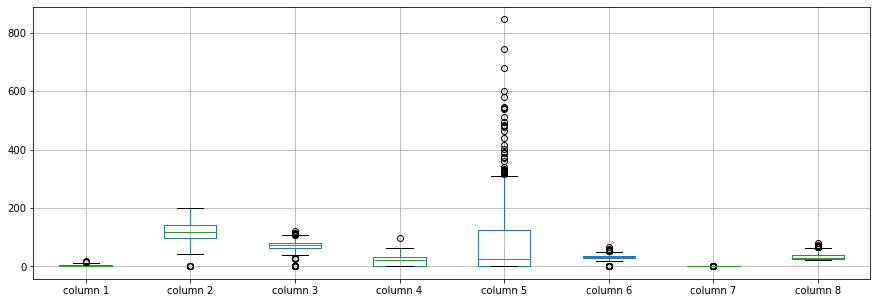

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.837270
column 2    121.060367
column 3     69.011811
column 4     20.479578
column 5     78.239789
column 6     32.014248
column 7      0.471890
column 8     33.164042
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.128074,0.138423,-0.079562,-0.071969,0.009053,-0.028037,0.548201
column 2,0.128074,1.000000,0.151402,0.064834,0.323508,0.218401,0.138631,0.264719
column 3,0.138423,0.151402,1.000000,0.203427,0.090670,0.296288,0.042067,0.237948
column 4,-0.079562,0.064834,0.203427,1.000000,0.433253,0.403941,0.188271,-0.108705
column 5,-0.071969,0.323508,0.090670,0.433253,1.000000,0.194573,0.187250,-0.037688
column 6,0.009053,0.218401,0.296288,0.403941,0.194573,1.000000,0.141742,0.035394
column 7,-0.028037,0.138631,0.042067,0.188271,0.187250,0.141742,1.000000,0.036888
column 8,0.548201,0.264719,0.237948,-0.108705,-0.037688,0.035394,0.036888,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+13,8+13+13,8+13+13+13,8+13+13+13+13,8+13+13+13+13+13,8+13+13+13+13+13+13,8+13+13+13+13+13,8+13+13+13+13,8+13+13+13,8+13+13,8+13,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 424.04363441467285
Epoch: 1 , loss: 421.4070930480957
Epoch: 2 , loss: 420.90037218729657
Epoch: 3 , loss: 421.9423891703288
Epoch: 4 , loss: 420.7513319651286
Epoch: 5 , loss: 420.44055366516113
Epoch: 6 , loss: 418.9316832224528
Epoch: 7 , loss: 417.2524077097575
Epoch: 8 , loss: 416.7757968902588
Epoch: 9 , loss: 414.266295115153
Epoch: 10 , loss: 412.6607557932536
Epoch: 11 , loss: 407.04783566792804
Epoch: 12 , loss: 398.0816478729248
Epoch: 13 , loss: 388.4529673258464
Epoch: 14 , loss: 376.3067213694255
Epoch: 15 , loss: 369.2987861633301
Epoch: 16 , loss: 360.3609612782796
Epoch: 17 , loss: 363.45201365152997
Epoch: 18 , loss: 358.32682100931805
Epoch: 19 , loss: 354.42667897542316
Epoch: 20 , loss: 343.54535420735675
Epoch: 21 , loss: 347.6715431213379
Epoch: 22 , loss: 343.1056957244873
Epoch: 23 , loss: 340.9967606862386
Epoch: 24 , loss: 338.30801582336426
Epoch: 25 , loss: 338.6591186523437

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(901.1424284180243, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.1559993999211955

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [20]:
imputations[-1].to_excel("PID_NN_1.xlsx", index=False, header=False)